*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[[65  3]
 [ 8 24]]
Accuracy Score 89.0 %


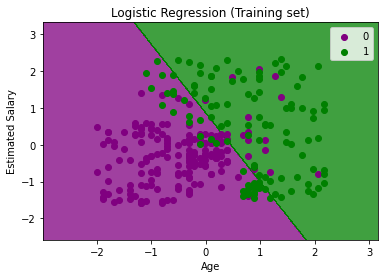

In [5]:
#Data Pre-procesing Step  
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
  
#importing datasets  
data_set= pd.read_csv('C:/Users/soumi/Downloads/user_data.csv')  
#Extracting Independent and dependent Variable  
x= data_set.iloc[:, [2,3]].values  
y= data_set.iloc[:, 4].values  
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)  
#Predicting the test set result  
y_pred= classifier.predict(x_test)  
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix,accuracy_score  
cm= confusion_matrix(y_test,y_pred) 
print(cm)
print("Accuracy Score",accuracy_score(y_test, y_pred)*100,"%") 
#Visualizing the training set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train
x11=nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01)
x22=nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01) 
x1,x2=nm.meshgrid(x11,x22) 
'''The numpy.meshgrid function is used to create a rectangular grid out of two given 
one-dimensional arrays representing the Cartesian indexing or Matrix indexing.'''
#x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
#nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' ))) 
'''The contourf() function in pyplot module of matplotlib library is used to plot contours.
 But contourf draw filled contours, while contourf draws contour lines.'''
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Logistic Regression (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  